In [1]:
using CSV
using DataFrames
using Plots, StatsPlots
using Statistics
using LaTeXStrings

In [2]:
theme(:default)
gr()

Plots.GRBackend()

In [3]:
dfs = []
for i in 1:50
    try
        df = CSV.File("../insights/fmnist_original/fmnist_regmh_0.0_0.0_0.0_$(i).csv", delim="\t") |> DataFrame
        push!(dfs, df)
    catch
        nothing
    end 
end 

df = vcat(dfs...)
df_ = df[(!).(isnan.(df[!, Symbol("Avg centroid distance")])), :]

m_inner_d = mean(df_[!, Symbol("Avg node empirical distance")])
m_outter_d =  mean(df_[!, Symbol("Avg centroid distance")])

3.816129751594119e6

┌ Warning: ../insights/fmnist/fmnist_regmh_0.01_0.001_1.0_6.csv
└ @ Main In[4]:19
┌ Warning: ../insights/fmnist/fmnist_regmh_0.1_0.001_1.0_7.csv
└ @ Main In[4]:19
┌ Warning: ../insights/fmnist/fmnist_regmh_1.0_0.001_1.0_24.csv
└ @ Main In[4]:19
┌ Warning: ../insights/fmnist/fmnist_regmh_10.0_0.001_1.0_34.csv
└ @ Main In[4]:19
┌ Warning: ../insights/fmnist/fmnist_regmh_10.0_0.001_1.0_40.csv
└ @ Main In[4]:19
┌ Warning: ../insights/fmnist/fmnist_regmh_10.0_0.001_1.0_43.csv
└ @ Main In[4]:19
┌ Warning: ../insights/fmnist/fmnist_regmh_100.0_0.001_1.0_31.csv
└ @ Main In[4]:19
┌ Warning: ../insights/fmnist/fmnist_regmh_100.0_0.001_1.0_38.csv
└ @ Main In[4]:19
┌ Warning: ../insights/fmnist/fmnist_regmh_1000.0_0.001_1.0_2.csv
└ @ Main In[4]:19
┌ Warning: ../insights/fmnist/fmnist_regmh_1000.0_0.001_1.0_8.csv
└ @ Main In[4]:19
┌ Warning: ../insights/fmnist/fmnist_regmh_0.01_0.01_1.0_4.csv
└ @ Main In[4]:19
┌ Warning: ../insights/fmnist/fmnist_regmh_0.01_0.01_1.0_18.csv
└ @ Main In[4]:19
┌ Warni

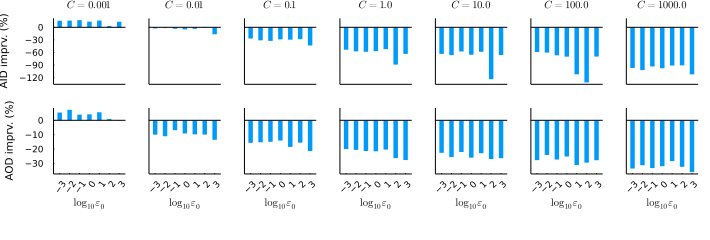

In [4]:
params = ["0.001", "0.01", "0.1", "1.0", "10.0", "100.0", "1000.0"]
coverted_params = map(x -> parse(Float64, x) |> log10, params)

plts1 = []
plts2 = []
fname = ""
for (i, C) in enumerate(params)
    inner_d = []
    outter_d = []

    for ep in params
        dfs = []
        for i in 1:50
            try
                fname = "../insights/fmnist/fmnist_regmh_$(ep)_$(C)_1.0_$i.csv"
                df = CSV.File(fname) |> DataFrame
                push!(dfs, df)
            catch
                @warn(fname)
            end 
        end 

        df = vcat(dfs...)
        df_ = df[(!).(isnan.(df[!, Symbol("Avg centroid distance")])), :]

        push!(inner_d, (-mean(df_[!, Symbol("Avg node empirical distance")]) + m_inner_d) / m_inner_d * 100)
        push!(outter_d, (mean(df_[!, Symbol("Avg centroid distance")]) - m_outter_d) / m_outter_d * 100)
    end 
    
    if i != 1
        p1 = bar(coverted_params, inner_d, legend=false, bar_width=0.45, grid=:off,
                 xticks=nothing, yticks=nothing, lw=0, 
                 xrotation=55, alpha=1, 
                 title=L"C=%$C")
        hline!([0], color="black", lw=1)
        p2 = bar(coverted_params, outter_d, legend=false, bar_width=0.45, 
                 xlabel=L"\log_{10} \epsilon_0", lw=0, 
                 xrotation=45, alpha=1, yticks=nothing, grid=:off,)
        hline!([0], color="black", lw=1)
    else 
        p1 = bar(coverted_params, inner_d, legend=false, bar_width=0.45, xticks=nothing, 
                 title=L"C=%$C", grid=:off, lw=0,
                 ylabel="AID imprv. (%)",  
                 alpha=1, 
                 xrotation=55)
        hline!([0], color="black", lw=1)
        p2 = bar(coverted_params, outter_d, legend=false, bar_width=0.45, 
                 xlabel=L"\log_{10} \epsilon_0", grid=:off, lw=0,
                 ylabel="AOD imprv. (%)", 
                 alpha=1, 
                 xrotation=55)
        hline!([0], color="black", lw=1)
    end 
    push!(plts1, p1)
    push!(plts2, p2)
end 


extra_p0 = plot(framestyle=:none)
extra_p1 = plot([0], [0], label="BHMC", 
                legendfontsize=10, legend=:top,
                lw=2, ls=:dot, framestyle=:none)
extra_p2 = plot(framestyle=:none)

l = @layout [
        grid(2, 7)  
        b{0.0001h}
    ]
p = plot(vcat(plts1, plts2)..., extra_p2, 
         layout=l, size=(710, 240), link=:y,
         tickfontsize=6, 
         titlefontsize=7,
         labelfontsize=7)



In [5]:
savefig(p, "fmnist_sens_ep_per_C_revised.pdf")

┌ Warning: ../insights/fmnist/fmnist_regmh_0.001_0.1_1.0_45.csv
└ @ Main In[6]:18
┌ Warning: ../insights/fmnist/fmnist_regmh_0.001_0.1_1.0_46.csv
└ @ Main In[6]:18
┌ Warning: ../insights/fmnist/fmnist_regmh_0.001_0.1_1.0_49.csv
└ @ Main In[6]:18
┌ Warning: ../insights/fmnist/fmnist_regmh_0.001_10.0_1.0_19.csv
└ @ Main In[6]:18
┌ Warning: ../insights/fmnist/fmnist_regmh_0.001_10.0_1.0_21.csv
└ @ Main In[6]:18
┌ Warning: ../insights/fmnist/fmnist_regmh_0.001_100.0_1.0_19.csv
└ @ Main In[6]:18
┌ Warning: ../insights/fmnist/fmnist_regmh_0.001_100.0_1.0_20.csv
└ @ Main In[6]:18
┌ Warning: ../insights/fmnist/fmnist_regmh_0.001_100.0_1.0_23.csv
└ @ Main In[6]:18
┌ Warning: ../insights/fmnist/fmnist_regmh_0.001_1000.0_1.0_7.csv
└ @ Main In[6]:18
┌ Warning: ../insights/fmnist/fmnist_regmh_0.001_1000.0_1.0_12.csv
└ @ Main In[6]:18
┌ Warning: ../insights/fmnist/fmnist_regmh_0.001_1000.0_1.0_36.csv
└ @ Main In[6]:18
┌ Warning: ../insights/fmnist/fmnist_regmh_0.001_1000.0_1.0_44.csv
└ @ Main In[6]:

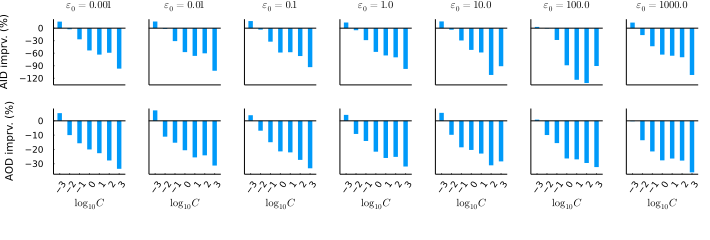

In [6]:
params = ["0.001", "0.01", "0.1", "1.0", "10.0", "100.0", "1000.0"]
coverted_params = map(x -> parse(Float64, x) |> log10, params)

plts1 = []
plts2 = []
for (i, ep) in enumerate(params)
    inner_d = []
    outter_d = []

    for C in params
        dfs = []
        for i in 1:50
            try
                fname = "../insights/fmnist/fmnist_regmh_$(ep)_$(C)_1.0_$i.csv"
                df = CSV.File(fname) |> DataFrame
                push!(dfs, df)
            catch
                @warn(fname)
            end 
        end 

        df = vcat(dfs...)
        df_ = df[(!).(isnan.(df[!, Symbol("Avg centroid distance")])), :]

        push!(inner_d, (-mean(df_[!, Symbol("Avg node empirical distance")]) + m_inner_d) / m_inner_d * 100)
        push!(outter_d, (mean(df_[!, Symbol("Avg centroid distance")]) - m_outter_d) / m_outter_d * 100)
    end 

    if i != 1
        p1 = bar(coverted_params, inner_d, legend=false, bar_width=0.45, grid=:off,
                 xticks=nothing, yticks=nothing, 
                 xrotation=55, alpha=1, lw=0, 
                 title=L"\epsilon_0=%$ep")
        hline!([0], color="black", lw=1)
        p2 = bar(coverted_params, outter_d, legend=false, bar_width=0.45, xlabel=L"\log_{10} C", 
                 xrotation=55, alpha=1, lw=0, yticks=nothing, grid=:off,)
        hline!([0], color="black", lw=1)
    else 
        p1 = bar(coverted_params, inner_d, legend=false, bar_width=0.45, xticks=nothing, 
                 title=L"\epsilon_0=%$ep", grid=:off, lw=0,
                 ylabel="AID imprv. (%)",  
                 alpha=1, 
                 xrotation=55)
        hline!([0], color="black", lw=1)
        p2 = bar(coverted_params, outter_d, legend=false, bar_width=0.45, 
                 xlabel=L"\log_{10} C", grid=:off,
                 ylabel="AOD imprv. (%)", lw=0, 
                 alpha=1, 
                 xrotation=55)
        hline!([0], color="black", lw=1)
    end 
    push!(plts1, p1)
    push!(plts2, p2)
end 

extra_p0 = plot(framestyle=:none)
extra_p1 = plot([0], [0], label="BHMC", 
                legendfontsize=10, legend=:top,
                lw=2, ls=:dot, framestyle=:none)
extra_p2 = plot(framestyle=:none)

l = @layout [
        grid(2, 7)  
        b{0.0001h}
    ]
p = plot(vcat(plts1, plts2)..., extra_p2, 
         layout=l, size=(710, 240), link=:y,
         tickfontsize=6, 
         titlefontsize=7,
         labelfontsize=7)



In [7]:
savefig(p, "fmnist_sens_C_per_ep_revised.pdf")